In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from scipy.stats import ttest_ind
import pingouin as pg



In [3]:
path = 'B:/Karpov Courses/Stat/Lesson4/experiment_lesson_4.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

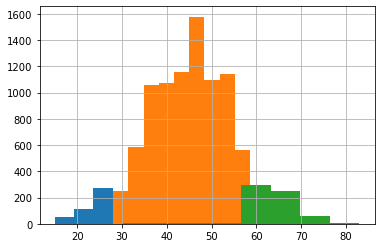

In [6]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

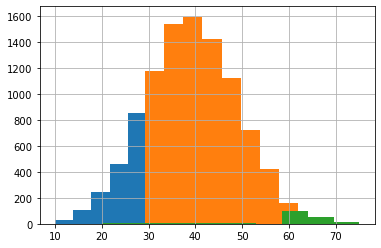

In [7]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

In [8]:
control_count = df.query('experiment_group == "control" & delivery_time > 0').delivery_time.count()

In [9]:
test_count = df.query('experiment_group == "test" & delivery_time > 0').delivery_time.count()

In [10]:
control_count - test_count

-12

In [11]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [12]:
zscore(df.delivery_time)

0        0.187425
1        0.861672
2        0.380067
3       -0.775787
4        0.091103
           ...   
20191   -0.005218
20192   -0.968429
20193   -1.835319
20194   -0.101539
20195   -0.101539
Name: delivery_time, Length: 20196, dtype: float64

In [13]:
zscale = zscore(df.delivery_time)

<AxesSubplot:>

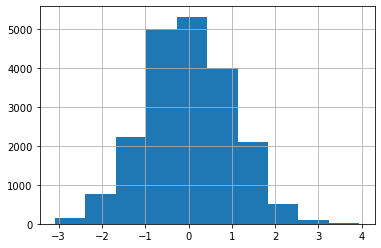

In [14]:
zscale.hist()

In [15]:
standard_deviation = df.delivery_time.std()

In [16]:
standard_deviation

10.382195557688112

In [17]:
standard_error_of_the_mean = df.delivery_time.sem()

C:\Users\Shaetan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


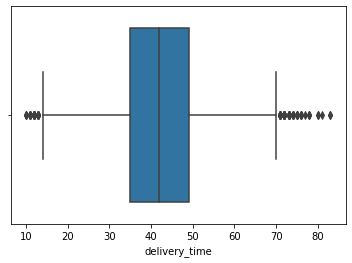

In [18]:
ax = sns.boxplot(df.delivery_time)

In [19]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [20]:
stats.shapiro(df.query("experiment_group == 'test'").delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9975475668907166, pvalue=0.14005419611930847)

In [21]:
stats.shapiro(df.query("experiment_group == 'control'").delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

<AxesSubplot:>

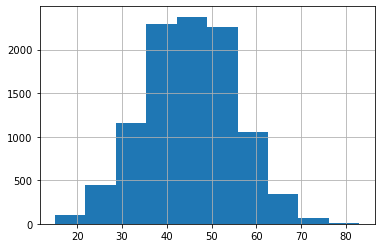

In [22]:
df.query("experiment_group == 'control'").delivery_time.hist()

In [23]:
round(df.query("experiment_group == 'test'").delivery_time.std(), 2)

9.88

In [24]:
round(df.query("experiment_group == 'control'").delivery_time.std(), 2)

9.99

In [62]:
ttest_ind(df.query("experiment_group == 'test'").delivery_time, df.query("experiment_group == 'control'").delivery_time )

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [64]:
test = df.query("experiment_group == 'test'").delivery_time.mean()
test

39.04681314330958

In [65]:
control = df.query("experiment_group == 'control'").delivery_time.mean()
control

45.065101070154576

In [67]:
round((test-control)/control*100, 2)

-13.35

In [26]:
pg.ttest(df.query("experiment_group == 'test'").delivery_time, df.query("experiment_group == 'control'").delivery_time )

C:\Users\Shaetan\anaconda3\lib\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-43.035552,20191.127788,two-sided,0.0,"[-6.29, -5.74]",0.605658,inf,1.0
